# Research on customer behavior
I am an analyst at Telecom company.

I have a random sample of data from 500 customers.

The data describes call usage, message usage, and browsing usage. 

My job is to examine customer behavior and determine which prepaid plan is most profitable.



### Table of Contents

* [Step 1. Open the data file and study the general information.](#step1)
    * [Calls table:](#call)
    * [Internet table:](#internet)
    * [Messages table:](#messages)
    * [Users table:](#user)
    * [step 1. conclusion](#step1.1)<br><br>
    
* [Step 2. Prepare the data](#step2.)
    * [step 2. conclusion](#step2.2)<br><br>
    
* [Step 3. Analyze the data](#step3.)
    * [Customer behavior analysis:](#customer.) 
    * [Histograms](#histograms.)
    * [Description of the histograms:](#discribe.)
    * [step 3. conclusion](#step3.3)<br><br>
    
* [Step 4. Test the hypotheses](#step4.)
    * [Hypothesis 1](#Hypothesis1.)
    * [Hypothesis 2](#Hypothesis2.)
    * [step 4. conclusion](#step4.1)

* [Step 5. Overall conclusion](#step5.)

## Step 1. Open the data file and study the general information <a class="anchor" id="step1"></a>

**We have five DataFrams, we will check them:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
from functools import reduce
import math
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
from pylab import rcParams
import warnings



df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')


**We will create a function that checks whether there are values equal to 0 and if so what is their relative share:**

In [2]:
def zeros(data):
    for i in data.columns:
        if len(data[data[i]==0]) == 0:
            print(i , len(data[data[i]==0]))
        else:
            print(i,len(data[data[i]==0]),(round(len(data[data[i]==0])/len(data[i]),3)))
            

### We will do a series of tests for each data:

### Calls table: <a class="anchor" id="call"></a>

In [3]:
df_calls.head(3)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48


In [4]:
df_calls.tail(3)

,id,user_id,call_date,duration
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86


In [5]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


There is a column that shows a date but is not of this type, we will fix that later.

In [6]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


**Zero's check:**

In [7]:
zeros(df_calls)

id 0
user_id 0
call_date 0
duration 26834 0.195


About **20 percent** of the duration column has a value of 0. 

We will suspect these values as **outliers** values and we will examine now if so.

**We will make a histogram on the duration column and check if it is normally distributed since we want to use the "three-sigma" rule.**

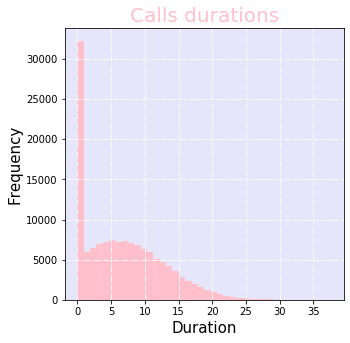

In [8]:
plt.figure(figsize=(5,5))
plt.title('Calls durations', size = 20 ,color = 'pink')
plt.xlabel('Duration',size =15)
plt.ylabel('Frequency',size = 15)
plt.hist(df_calls.duration ,bins=40, color = 'pink')
plt.grid(color='white', linestyle='-.', linewidth=0.9)
ax = plt.gca()
ax.set_facecolor('lavender')
plt.show;

### Conclusion on duration column:
##### It can certainly be seen that the data is distributed normally, and there is a peak when the value is 0.
_We will use  the "three-sigma" rule.:_

In [9]:
x1 = df_calls.duration.mean()-3*np.std(df_calls.duration)
x2 = df_calls.duration.mean()+3*np.std(df_calls.duration) 
filter_calls = df_calls[(df_calls['duration']<x2) & (df_calls['duration']>x1) ]
round(len(filter_calls)/len(df_calls),2)

1.0

#### Conclusion Examining the three sigmas:

The whole data seems to be in the range of **+- 3 sigmas**.

It can be concluded that our suspicious values (the 0 values) are **true values** and not outliers that need to be delited. We will consider them as a missed calls and will not remove them..

**Check duplicated values:**

In [10]:
print('there is',len(df_calls[df_calls.duplicated()]),'duplicated values')

there is 0 duplicated values


### Internet table: <a class="anchor" id="internet"></a>

In [11]:
df_internet.head(3)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40


In [12]:
df_internet.tail(3)

,id,user_id,session_date,mb_used
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00
104824,1499_219,1499,2018-12-24,758.31


In [13]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


There is a column that shows a date but is not of this type, we will fix that later.

In [14]:
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


**Zero's check:**

In [15]:
zeros(df_internet)

id 0
user_id 0
session_date 0
mb_used 13747 0.131


About **13 percent** of the mb_used  column has a value of 0. 

We will suspect these values as **outliers** values and we will examine now if so.

**We will make a histogram on the mb_used column and check if it is normally distributed since we want to use the "three-sigma" rule.**

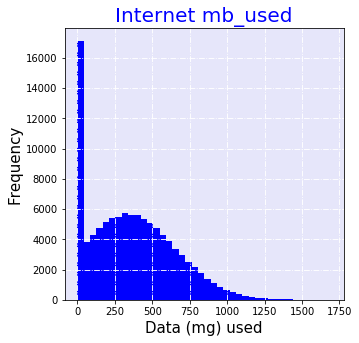

In [16]:
plt.figure(figsize=(5,5))
plt.title('Internet mb_used', size = 20,color= 'b')
plt.xlabel('Data (mg) used',size =15)
plt.ylabel('Frequency',size = 15)
plt.hist(df_internet.mb_used ,bins=40, color = 'b')
plt.grid(color='white', linestyle='-.', linewidth=0.9)
ax = plt.gca()
ax.set_facecolor('lavender')
plt.show();

### Conclusion on duration column:
##### It can certainly be seen that the data is distributed normally, and there is a peak when the value is 0.
_We will use  the "three-sigma" rule.:_

In [17]:
x1 = df_internet.mb_used.mean()-3*np.std(df_internet.mb_used)
x2 = df_internet.mb_used.mean()+3*np.std(df_internet.mb_used) 
filter_internet = df_internet[(df_internet['mb_used']<x2) & (df_internet['mb_used']>x1) ]
round(len(filter_internet)/len(df_internet),2)

1.0

#### Conclusion Examining the three sigmas:

The whole data seems to be in the range of **+- 3 sigmas**.

It can be concluded that our suspicious values (the 0 values) are **true values** and not outlier that need to be deliteded. We will consider them as **momentary use of surfing that did not create a charge** and will not remove them.

**Check duplicated values:**

In [18]:
print('there is',len(df_internet[df_internet.duplicated()]),'duplicated values on df_internet tale ')

there is 0 duplicated values on df_internet tale 


### Messages table: <a class="anchor" id="messages"></a>

In [19]:
df_messages.head(3)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31


In [20]:
df_messages.tail(3)

,id,user_id,message_date
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24
76050,1497_613,1497,2018-12-23


In [21]:
df_messages.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


There is a column that shows a date but is not of this type, we will fix that later.

In [22]:
df_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


**Zero's check:**

In [23]:
zeros(df_messages)

id 0
user_id 0
message_date 0


Everything seems to be fine! We will check the distribution-

In [24]:
messages = df_messages.groupby('user_id')['id'].count().reset_index()
messages.describe()

,user_id,id
count,402.000000,402.000000
mean,1248.639303,189.181592
std,143.678749,192.207920
min,1000.000000,1.000000
25%,1124.250000,60.000000
50%,1247.500000,126.500000
75%,1372.750000,258.750000
max,1497.000000,1288.000000


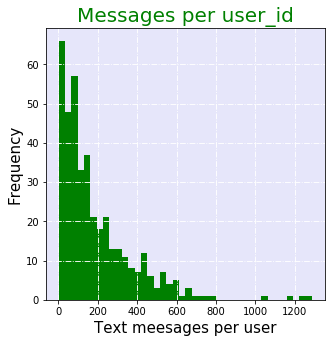

In [25]:
plt.figure(figsize=(5,5))
plt.title('Messages per user_id', size = 20,color= 'g')
plt.xlabel('Text meesages per user',size =15)
plt.ylabel('Frequency',size = 15)
plt.hist(messages.id ,bins=40, color = 'g')
plt.grid(color='white', linestyle='-.', linewidth=0.9)
ax = plt.gca()
ax.set_facecolor('lavender')
plt.show();

This histogram shows the usage of users' messages.

It can be seen that the distribution is normal but skewed to the right, it can be assumed that this skewed is due to a large difference in the use of text messages between users. 

**Hypothesis that we may test** - is there an inverse relationship (-1 in the Pearson rule) between the use of the Internet by the user and the use of messages? (Those who use the Internet to send messages use less SMS) Who knows ....

**Check duplicated values:**

In [26]:
print('there is',len(df_messages[df_messages.duplicated()]),'duplicated values on df_messages tale ')

there is 0 duplicated values on df_messages tale 


### Plan table:

In [27]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [28]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


### Users table:<a class="anchor" id="user"></a>

In [29]:
df_users.head(3)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN


In [30]:
df_users.tail(3)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN


In [31]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


There is a columns that shows a date but them not of this type, we will fix that later.

There are lots of NULL values in the "churn_date" column but that's actually a good sign, not many customers have left the company! We will check if they belonged to a particular program:

In [32]:
df_users[df_users.churn_date.notnull()].groupby('plan').count()

,user_id,first_name,last_name,age,city,reg_date,churn_date
plan,,,,,,,
surf,23,23,23,23,23,23,23
ultimate,11,11,11,11,11,11,11


There are double the number of customers who left and were in the surf plan compared to the customers who were in the ultimate plan.I wonder why......

**Zero's check:**

In [33]:
zeros(df_users)

user_id 0
first_name 0
last_name 0
age 0
city 0
reg_date 0
plan 0
churn_date 0


Everything seems to be fine! We will do some testing regarding the dates, and the plans and make sure everything makes sense!

In [34]:
df_users['plan'].unique()

array(['ultimate', 'surf'], dtype=object)

No "weird" values on "plan" column.

 [Checking the validity of dates will be after converting the type.](#check_date)

**Check duplicated values:**

In [35]:
print('there is',len(df_users[df_users.duplicated()]),'duplicated values on df_users tale')

there is 0 duplicated values on df_users tale


### Conclusions Step 1. <a class="anchor" id="step1.1"></a>
According to the tests we did-
1. Outliers check.
2. Check NULL values
3. Distribution test
4. Duplicate test

It can be concluded that the sample we have is correct and **the information in it is reliable**.

We explained the problems we found in the call table and the internet table but despite the abnormal values around 0, we decided not to delete them from the data.

It is possible to check the connection between the users in the browsing and the users in the messages (regardless of the plan).

<a class="anchor" id="step2."></a>
## Step 2. Prepare the data

**<span style="color:green">We will prepare the data before approaching the analysis. We will convert types, create required data, and merge tables.</span>**




**According to the conditions, we will round up the duration of the call minutes.**

In [36]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil)


**As we noted earlier, it is now required to change all columns that display a date to a date type:**

In [37]:
df_calls['call_date']               = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date']         = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_messages['message_date']         = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_users[['reg_date','churn_date']] = df_users[['reg_date','churn_date']].apply(pd.to_datetime)


**Check validility on the columns below**  <a class="anchor" id="check_date"></a>

In [38]:
df_users.query('churn_date < reg_date')

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


It seems that there is no problem with the churn and reg dates, this is also perfect!

**Now that we have converted the columns that contained dates, we need to add a new column "month" so that we can group the data by months:**

In [39]:
df_calls['month']    = df_calls['call_date'].dt.month.astype('int')
df_internet['month'] = df_internet['session_date'].dt.month.astype('int')
df_messages['month'] = df_messages['message_date'].dt.month.astype('int')

**We will group the data about the monthly usage of calls for each user-**

In [40]:
#df_calls.groupby('user_id')['call_month','duration']
 


,user_id,month,total_calls,total_time_calls
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0


**We will group the data about the monthly usage of text messages for each user-**

In [41]:
user_monthly_messages = df_messages.pivot_table(index = ['user_id','month'], values =['id'], aggfunc =['count']).reset_index().sort_values(by=['user_id'])
user_monthly_messages.columns = ['user_id' , 'month' , 'total_text']
user_monthly_messages.head(3)

,user_id,month,total_text
0,1000,12,11
1,1001,8,30
2,1001,9,44


**We will group the data about the monthly usage of mg for each user-**

In [42]:
user_monthly_internet_mb = df_internet.pivot_table(index = ['user_id','month'], values =['mb_used'], aggfunc =['sum']).reset_index().sort_values(by=['user_id'])
user_monthly_internet_mb.columns = ['user_id', 'month', 'mb_used']
user_monthly_internet_mb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 2276
Data columns (total 3 columns):
user_id    2277 non-null int64
month      2277 non-null int64
mb_used    2277 non-null float64
dtypes: float64(1), int64(2)
memory usage: 71.2 KB


**I have created a function that round up the mg usage and turn it to gb usage so that we can add a column of monthly use of the gb.**

In [43]:
def myround(x):
    return (math.ceil(x/1024))


In [44]:
user_monthly_internet_mb['total_gb'] = user_monthly_internet_mb['mb_used'].apply(myround)
user_monthly_internet_mb.head(3)

,user_id,month,mb_used,total_gb
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14


**Now that we have prepared all the tables, we want to merge them into one table, based on the User and month columns.**

In [45]:
data_frames = [user_monthly_calls, user_monthly_messages, user_monthly_internet_mb]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],how='outer'), data_frames)
df_merged.columns = ['user_id', 'month', 'total_calls' , 'total_time_calls','total_text', 'mb_used', 'total_gb']

**We will check the merged table:**

In [46]:
df_merged.head(3)

,user_id,month,total_calls,total_time_calls,total_text,mb_used,total_gb
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0


In [47]:
df_merged.tail(3)

,user_id,month,total_calls,total_time_calls,total_text,mb_used,total_gb
2290,1482,10,NaN,NaN,2.0,NaN,NaN
2291,1108,12,NaN,NaN,NaN,233.17,1.0
2292,1311,6,NaN,NaN,NaN,1498.83,2.0


In [48]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
user_id             2293 non-null int64
month               2293 non-null int64
total_calls         2258 non-null float64
total_time_calls    2258 non-null float64
total_text          1806 non-null float64
mb_used             2277 non-null float64
total_gb            2277 non-null float64
dtypes: float64(5), int64(2)
memory usage: 143.3 KB


In [49]:
df_merged.describe()

,user_id,month,total_calls,total_time_calls,total_text,mb_used,total_gb
count,2293.000000,2293.000000,2258.000000,2258.000000,1806.000000,2277.000000,2277.000000
mean,1246.075883,9.172700,60.998671,435.937555,42.110188,16882.197501,16.989021
std,143.051927,2.496386,31.770869,231.972343,33.122931,7869.784848,7.693683
min,1000.000000,1.000000,1.000000,0.000000,1.000000,92.310000,1.000000
25%,1122.000000,8.000000,39.000000,275.000000,17.000000,12347.720000,13.000000
50%,1245.000000,10.000000,60.000000,429.000000,34.000000,16873.740000,17.000000
75%,1368.000000,11.000000,80.000000,574.750000,59.000000,21041.520000,21.000000
max,1499.000000,12.000000,205.000000,1510.000000,266.000000,70931.590000,70.000000


In [50]:
zeros(df_merged)

user_id 0
month 0
total_calls 0
total_time_calls 2 0.001
total_text 0
mb_used 0
total_gb 0


There are almost no 0 values. Which means that most users use the Megaline services every month.

**Check duplicated values:**

In [51]:
print('there is',len(df_merged[df_merged.duplicated()]),'duplicated values on df_merged tale')

there is 0 duplicated values on df_merged tale


In [52]:
df_merged.isnull().mean()

user_id             0.000000
month               0.000000
total_calls         0.015264
total_time_calls    0.015264
total_text          0.212386
mb_used             0.006978
total_gb            0.006978
dtype: float64

We see that the total_text column contains about **20% NULL** values, which is a strange figure since in the organic table of messages there are no NULL values at all!

It is possible that since we have grouped by months there are whole months in which the users did not use the messages at all.

We would like (again) to check  the correlation between the messages and the other relevant values.

**We will activate the coor function now:**


In [53]:
relevent_data = df_merged[['total_time_calls','total_text','total_gb']]
print(relevent_data.corr()['total_text'])

total_time_calls    0.281633
total_text          1.000000
total_gb            0.320465
Name: total_text, dtype: float64


Our hypothesis has fallen .... there does not seem to be a correlation between the use of messages and the use of another service. 

Maybe it depends on the plan? We will check this later.

**We will now merge the table with the calculated data (df_merge) into the table with the user details.**

In [54]:
df_total = pd.merge(right = df_merged , 
                left = df_users, how='outer',on=['user_id'])

In [55]:
df_total.head(3)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,total_calls,total_time_calls,total_text,mb_used,total_gb
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12.0,16.0,124.0,11.0,1901.47,2.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8.0,27.0,182.0,30.0,6919.15,7.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,9.0,49.0,315.0,44.0,13314.82,14.0


In [56]:
df_total.tail(3)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,total_calls,total_time_calls,total_text,mb_used,total_gb
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,11.0,45.0,308.0,NaN,16813.83,17.0
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,9.0,41.0,346.0,NaN,12984.76,13.0
2302,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,12.0,65.0,496.0,NaN,22059.21,22.0


In [57]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 14 columns):
user_id             2303 non-null int64
first_name          2303 non-null object
last_name           2303 non-null object
age                 2303 non-null int64
city                2303 non-null object
reg_date            2303 non-null datetime64[ns]
plan                2303 non-null object
churn_date          160 non-null datetime64[ns]
month               2293 non-null float64
total_calls         2258 non-null float64
total_time_calls    2258 non-null float64
total_text          1806 non-null float64
mb_used             2277 non-null float64
total_gb            2277 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 269.9+ KB


Same numbers in here as well.

Since I trust there is no error in the data and i believe that where there is null it means that no use has been made of the service.

**I will fill the null values with 0 in the relevant columns:**

In [58]:
df_total['total_calls'].fillna(0, inplace = True)
df_total['total_time_calls'].fillna(0, inplace = True)
df_total['total_text'].fillna(0, inplace = True)
df_total['total_gb'].fillna(0, inplace = True)

In [59]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 14 columns):
user_id             2303 non-null int64
first_name          2303 non-null object
last_name           2303 non-null object
age                 2303 non-null int64
city                2303 non-null object
reg_date            2303 non-null datetime64[ns]
plan                2303 non-null object
churn_date          160 non-null datetime64[ns]
month               2293 non-null float64
total_calls         2303 non-null float64
total_time_calls    2303 non-null float64
total_text          2303 non-null float64
mb_used             2277 non-null float64
total_gb            2303 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 269.9+ KB


In [60]:
print('there is',len(df_total[df_total.duplicated()]),'duplicated values on df_total tale')

there is 0 duplicated values on df_total tale


**Now all we have left to do to continue testing the hypotheses is calculate the profit.**

**And for that I have built a function that will do this:**

In [61]:
def profit (data):
    pack       = data['plan']
    call_total = data['total_time_calls']
    text_toatl = data['total_text']
    gb_total   = data['total_gb']
    pack_cost  = 0
    pack_call  = 0
    pack_text  = 0
    pack_mb    = 0
    over_call  = 0
    over_mb    = 0
    over_text  = 0
    
    if pack == 'surf':
        pack_cost = 20
        pack_call = 500
        pack_text = 50
        pack_gb   = 15
        over_call = 0
        over_gb   = 0
        over_text = 0

        if call_total > pack_call:
            over_call = (call_total  - pack_call)
        if text_toatl > pack_text:
            over_text = (text_toatl  - pack_text)
        if gb_total   > pack_gb:
            over_gb   = (gb_total    - pack_gb)
            
        total_profit = pack_cost + (over_call*0.03) + (over_text*0.03) +(over_gb*10)
    elif pack == 'ultimate':
        pack_cost = 70
        pack_call = 3000
        pack_text = 1000
        pack_gb   = 30
        over_call = 0
        over_gb   = 0
        over_text = 0

        if call_total > pack_call:
            over_call = (call_total  - pack_call)
        if text_toatl > pack_text:
            over_text = (text_toatl  - pack_text)
        if gb_total   > pack_gb:
            over_gb   = (gb_total    - pack_gb)
        total_profit = pack_cost + (over_call*0.01) + (over_text*0.01) +(over_gb*7)
    
    return total_profit

**We will now run the function and add the "profit" column**

In [62]:
df_total['profit'] = df_total.apply(profit ,axis=1)

In [63]:
df_total.head(3)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,total_calls,total_time_calls,total_text,mb_used,total_gb,profit
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12.0,16.0,124.0,11.0,1901.47,2.0,70.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8.0,27.0,182.0,30.0,6919.15,7.0,20.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,9.0,49.0,315.0,44.0,13314.82,14.0,20.0


In [64]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 15 columns):
user_id             2303 non-null int64
first_name          2303 non-null object
last_name           2303 non-null object
age                 2303 non-null int64
city                2303 non-null object
reg_date            2303 non-null datetime64[ns]
plan                2303 non-null object
churn_date          160 non-null datetime64[ns]
month               2293 non-null float64
total_calls         2303 non-null float64
total_time_calls    2303 non-null float64
total_text          2303 non-null float64
mb_used             2277 non-null float64
total_gb            2303 non-null float64
profit              2303 non-null float64
dtypes: datetime64[ns](2), float64(7), int64(2), object(4)
memory usage: 287.9+ KB


In [65]:
df_total.profit.describe()

count    2303.000000
mean       64.245410
std        46.579107
min        20.000000
25%        23.390000
50%        70.000000
75%        70.000000
max       590.370000
Name: profit, dtype: float64

In [66]:
df_total.profit.value_counts().head(5)

70.0    719
20.0    437
50.0     49
40.0     47
80.0     46
Name: profit, dtype: int64

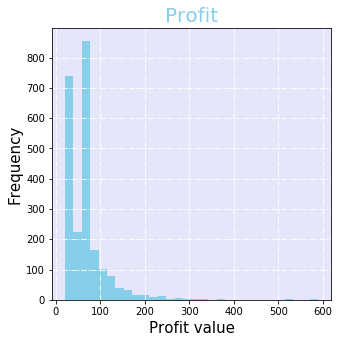

In [67]:
plt.figure(figsize=(5,5))
plt.title('Profit', size = 20, color = 'skyblue')
plt.xlabel('Profit value',size =15)
plt.ylabel('Frequency',size = 15)
plt.hist(df_total.profit,bins=30, color = 'skyblue')
plt.grid(color='white', linestyle='-.', linewidth=0.9)
ax = plt.gca()
ax.set_facecolor('lavender')
plt.show();

### Conclusion on profit column:
##### It can certainly be seen that the data is distributed normally, and there is a peak near 20 and anoher on  70. That is of course the prices of the pre-paid plans  that offered.

_We will use  the "three-sigma" rule.:_

In [68]:
x1 = df_total.profit.mean()-3*np.std(df_total.profit)
x2 = df_total.profit.mean()+3*np.std(df_total.profit)
filter_total = df_total[(df_total['profit']<x2) & (df_total['profit']>x1) ]
round(len(filter_total)/len(df_total),2)

0.98

#### Conclusion Examining the three sigmas:

While not 100% is within +-3sigma but 98-99 percent it is excellent!

It can be concluded that our suspicious values  **not an outliers**.

<a class="anchor" id="step2.2"></a> 
### Conclusions Step 2.
Based on what we did we can say this:

1. The merges we created between the tables created us with additional null values that we did not have in the original tables.
2. It can be said that the monthly profit from each customer regardless of the plan, is distributed normally.
3. Just few users do not use the service.

**Now on the basis of the prepared table it is possible to further examine the behavior of customers.**

## Step 3. Analyze the data<a class="anchor" id="step3."></a>

**<span style="color:green">In this step we will describe the customers' behavior and find the minutes, texts, volume of data of the users of each plan per month. We'll also calculate the mean, dispersion, and standard deviation. Eventually we'll plot histograms and describe the distributions.</span>**




**The merged table already has a "month" column. Now in order to examine the information according to the plan, we want to split the data into two datasets divided according to  plan column.**

In [69]:
df_surf     = df_total[df_total['plan'] == 'surf']
df_ultimate = df_total[df_total['plan'] == 'ultimate']
print(df_surf.info(),df_ultimate.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1579 entries, 1 to 2302
Data columns (total 15 columns):
user_id             1579 non-null int64
first_name          1579 non-null object
last_name           1579 non-null object
age                 1579 non-null int64
city                1579 non-null object
reg_date            1579 non-null datetime64[ns]
plan                1579 non-null object
churn_date          107 non-null datetime64[ns]
month               1573 non-null float64
total_calls         1579 non-null float64
total_time_calls    1579 non-null float64
total_text          1579 non-null float64
mb_used             1558 non-null float64
total_gb            1579 non-null float64
profit              1579 non-null float64
dtypes: datetime64[ns](2), float64(7), int64(2), object(4)
memory usage: 197.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 2287
Data columns (total 15 columns):
user_id             724 non-null int64
first_name          724 non-nu

In [70]:
print("The data ratio is {:.2}".format(len(df_ultimate)/len(df_surf)))

The data ratio is 0.46


**The data df_surf contains almost twice the values of the data df_ultimate.**

**<span style="color:blue">Now that I have split, I want to calculate the parameters- mean, dispersion, and standard deviation.</span>**
    
<span style="color:blue">To do this I've made a function (I did not have to, but as a lesson from routine operations in a previous project I decided to do so).</span>

<span style="color:blue">I will apply it on both datasets, and then merge all the statistics in one table.</span>




In [71]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name
def stats (df, x, y):
    
    df_stat= []
    df_name = get_df_name(df)
    data = df[x]
    mean = df[x].mean()
    var  = np.var(df[x])
    std  = np.std(df[x])
    name = str(str("['")+df[x].name+str("']"))
    stats = {'Mean of '+name:mean, 'Var  of '+name:var, 'Std  of '+name:std}
    df_stat.append(stats)
    df_stat = pd.DataFrame(df_stat) 
    y = df_stat.transpose()
    y.columns = [df_name]
    
    for state, capital in  stats.items(): 
        print('The',state , 'is:{:.5}'.format(capital))
        
    
    return y
   

In [72]:
empty_list = []

**We will activate the function on df_surf and export the values to DataFrames:**

In [73]:
surf_calls = pd.DataFrame(stats(df_surf, 'total_time_calls',empty_list))
surf_text  = pd.DataFrame(stats(df_surf, 'total_text',empty_list))
surf_gb    = pd.DataFrame(stats(df_surf, 'total_gb',empty_list))
profit_surf    =pd.DataFrame(stats(df_surf,'profit', empty_list))

df_surf_stat = surf_calls.append(surf_text)
df_surf_stat = df_surf_stat.append(surf_gb)

The Mean of ['total_time_calls'] is:427.12
The Var  of ['total_time_calls'] is:5.542e+04
The Std  of ['total_time_calls'] is:235.42
The Mean of ['total_text'] is:31.041
The Var  of ['total_text'] is:1125.4
The Std  of ['total_text'] is:33.547
The Mean of ['total_gb'] is:16.607
The Var  of ['total_gb'] is:62.363
The Std  of ['total_gb'] is:7.897
The Mean of ['profit'] is:60.552
The Var  of ['profit'] is:3060.5
The Std  of ['profit'] is:55.322


**Surf plan statistics:**

In [74]:
df_surf_stat

,df_surf
Mean of ['total_time_calls'],427.120329
Var of ['total_time_calls'],55420.456705
Std of ['total_time_calls'],235.415498
Mean of ['total_text'],31.041165
Var of ['total_text'],1125.404892
Std of ['total_text'],33.547055
Mean of ['total_gb'],16.607346
Var of ['total_gb'],62.362606
Std of ['total_gb'],7.897000


**We will activate the function on df_ultimate and export the values to DataFrames:**

In [75]:
ultimate_calls =pd.DataFrame(stats(df_ultimate, 'total_time_calls',empty_list))
ultimate_text  =pd.DataFrame(stats(df_ultimate, 'total_text',empty_list))
ultimate_gb    =pd.DataFrame(stats(df_ultimate, 'total_gb', empty_list))
profit_ultimate  =pd.DataFrame(stats(df_ultimate,'profit', empty_list))


df_ultimate_stat = ultimate_calls.append(ultimate_text)
df_ultimate_stat = df_ultimate_stat.append(ultimate_gb)


The Mean of ['total_time_calls'] is:428.07
The Var  of ['total_time_calls'] is:5.8463e+04
The Std  of ['total_time_calls'] is:241.79
The Mean of ['total_text'] is:37.344
The Var  of ['total_text'] is:1208.2
The Std  of ['total_text'] is:34.759
The Mean of ['total_gb'] is:17.211
The Var  of ['total_gb'] is:60.07
The Std  of ['total_gb'] is:7.7505
The Mean of ['profit'] is:72.301
The Var  of ['profit'] is:128.98
The Std  of ['profit'] is:11.357


**Ultimate plan statistics:**

In [76]:
df_ultimate_stat

,df_ultimate
Mean of ['total_time_calls'],428.071823
Var of ['total_time_calls'],58463.016941
Std of ['total_time_calls'],241.791267
Mean of ['total_text'],37.343923
Var of ['total_text'],1208.156579
Std of ['total_text'],34.758547
Mean of ['total_gb'],17.211326
Var of ['total_gb'],60.069982
Std of ['total_gb'],7.750483


**Both plans statistics:**

In [77]:
stat_overall = pd.concat([df_surf_stat, df_ultimate_stat], axis=1, sort=False)
stat_overall

,df_surf,df_ultimate
Mean of ['total_time_calls'],427.120329,428.071823
Var of ['total_time_calls'],55420.456705,58463.016941
Std of ['total_time_calls'],235.415498,241.791267
Mean of ['total_text'],31.041165,37.343923
Var of ['total_text'],1125.404892,1208.156579
Std of ['total_text'],33.547055,34.758547
Mean of ['total_gb'],16.607346,17.211326
Var of ['total_gb'],62.362606,60.069982
Std of ['total_gb'],7.897000,7.750483


**We will add a "difference" column to easily see the differences between the plans**

In [78]:
stat_overall['difference'] =  stat_overall.df_surf - stat_overall.df_ultimate 

In [79]:
stat_overall 

,df_surf,df_ultimate,difference
Mean of ['total_time_calls'],427.120329,428.071823,-0.951494
Var of ['total_time_calls'],55420.456705,58463.016941,-3042.560236
Std of ['total_time_calls'],235.415498,241.791267,-6.375769
Mean of ['total_text'],31.041165,37.343923,-6.302757
Var of ['total_text'],1125.404892,1208.156579,-82.751687
Std of ['total_text'],33.547055,34.758547,-1.211492
Mean of ['total_gb'],16.607346,17.211326,-0.603980
Var of ['total_gb'],62.362606,60.069982,2.292624
Std of ['total_gb'],7.897000,7.750483,0.146517


<a class="anchor" id="customer."></a> **<h2><span style="color:Gold">Customer behavior analysis:</span></h2>** 

**<span style="color:red">Calls:</span>**

The average monthly call usage for customers of both plans is about 428 minutes per month.<br>
After adding the column, we immediately notice a difference in the duration of the calls.<br>
The difference is about about 3000 minutes in favor of the ultimate program.<br>
It's teache us that even the **average duration of calls is similar** , the **distribution of data in the Ultimate** plan is **greater**, it can be concluded that usage patterns may be different in reality.
#### The source of this big scatter may be because customers in the ultimate plan have a larger data package, which could explain the large scatter.

**<span style="color:red">Text:</span>**

The average monthly usage of two plans is different. The average usage of messages in the surf plan is 31 monthly messages, while the average monthly use of the ultimate program is greater than it in 6+ messages , 37.3.<br>
If we look at the variance it seems that as in calls here too **the variance is much greater in the ultimate program compared to the surf program**.<br>
It can be concluded from this that the actual data may show that the uses are not necessarily similar or close as seen on average.<br>
To do this, you should check what the median value is.
In both programs it can be said that **the users do not prefer to use the text messaging service too much** and this is even though they buy a considerable amount of messages per month in advance.

**<span style="color:red">Internet:</span>**

The **averages** of the two plans **are similar**, while **the variance is greater** among surf plan users.<br>
It can be said that the average monthly usage is relatively high.<br>
In the surf plan the costumers go through the monthly use every month, which means **they are willing to pay more** for internet (this is very good for the company),on the other hand, the customers in the ultimate plan do not take advantage of most of the Internet.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
You have analysed plans in details, well done :)
</div>

In [80]:
mean_call_surf = stat_overall.iloc[0,0]
var_call_surf = stat_overall.iloc[1,0]
std_call_surf = stat_overall.iloc[2,0]

mean_text_surf = stat_overall.iloc[3,0]
var_text_surf = stat_overall.iloc[4,0]
std_text_surf = stat_overall.iloc[5,0]

mean_gb_surf = stat_overall.iloc[6,0]
var_gb_surf = stat_overall.iloc[7,0]
std_gb_surf = stat_overall.iloc[8,0]

<a class="anchor" id="histograms."></a>**After analyzing consumer behavior, we will look at the matching histograms, and see if they match the data:**

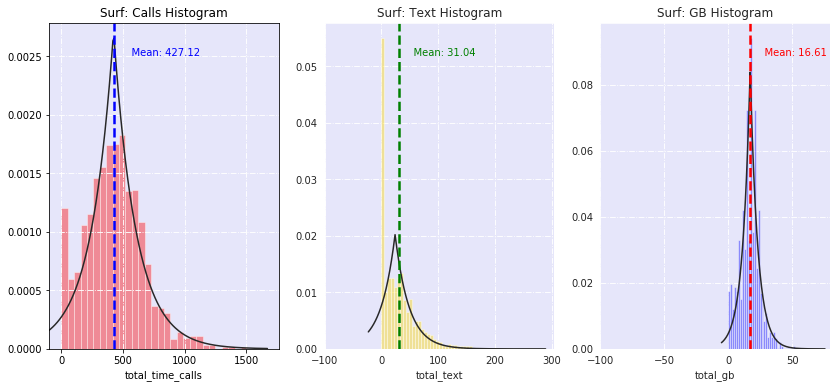

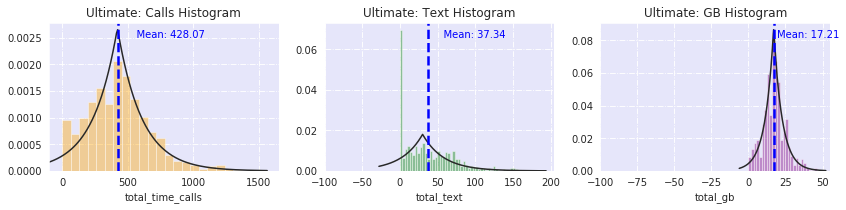

In [81]:
plt.figure(figsize=(14,6)) 
####surf call hist####
plt.subplot(1,3,1)
sns.set_style('darkgrid')
sns.distplot(df_surf['total_time_calls'],fit=st.laplace, kde=False, color = 'red')
plt.title('Surf: Calls Histogram')

plt.axvline(np.mean(df_surf['total_time_calls']), color='b', linestyle='dashed', linewidth=2.5)
_, max_ = plt.ylim()
plt.text(
         df_surf['total_time_calls'].mean() + df_surf['total_time_calls'].mean() / 10,
         max_ - max_ / 10,
         "    Mean: {:.2f}".format(df_surf['total_time_calls'].mean()),
         color = 'b',
         )

plt.xlim(-100)
plt.grid(color='white', linestyle='-.', linewidth=0.9)
ax = plt.gca()
ax.set_facecolor('lavender');
#####################

####surf text hist###
plt.subplot(1,3,2)
sns.set_style('darkgrid')
sns.distplot(df_surf['total_text'],bins= 50,fit=st.laplace, kde=False, color = 'gold')
plt.title('Surf: Text Histogram')

plt.axvline(np.mean(df_surf['total_text']), color='g', linestyle='dashed', linewidth=2.5)
_, max_ = plt.ylim()
plt.text(
         df_surf['total_text'].mean() + df_surf['total_text'].mean() / 10,
         max_ - max_ / 10,
         "    Mean: {:.2f}".format(df_surf['total_text'].mean()),
         color = 'g',
         )

plt.xlim(-100)
plt.grid(color='white', linestyle='-.', linewidth=0.9)
ax = plt.gca()
ax.set_facecolor('lavender');
#####################

####surf gb hist#####
plt.subplot(1,3,3)
sns.set_style('darkgrid')
sns.distplot(df_surf['total_gb'],fit=st.laplace, kde=False, color = 'b')
plt.axvline(np.mean(df_surf['total_gb']), color='r', linestyle='dashed', linewidth=2.5)
plt.title('Surf: GB Histogram')

_, max_ = plt.ylim()
plt.text(
         df_surf['total_gb'].mean() + df_surf['total_gb'].mean() / 10,
         max_ - max_ / 10,
         "    Mean: {:.2f}".format(df_surf['total_gb'].mean()),
         color = 'r',
        )

plt.xlim(-100)
plt.grid(color='white', linestyle='-.', linewidth=0.9)
ax = plt.gca()
ax.set_facecolor('lavender');


#####################


####ultimate calls hist#
plt.figure(figsize=(14,6)) 
plt.subplot(2,3,1)
sns.set_style('darkgrid')
sns.distplot(df_ultimate['total_time_calls'],fit=st.laplace, kde=False , color = 'orange')
plt.title('Ultimate: Calls Histogram')
plt.axvline(np.mean(df_ultimate['total_time_calls']), color='b', linestyle='dashed', linewidth=2.5)

_, max_ = plt.ylim()
plt.text(
         df_ultimate['total_time_calls'].mean() + df_ultimate['total_time_calls'].mean() / 10,
         max_ - max_ / 10,
         "    Mean: {:.2f}".format(df_ultimate['total_time_calls'].mean()),
         color = 'b',
         )

plt.xlim(-100)
plt.grid(color='white', linestyle='-.', linewidth=0.9)
ax = plt.gca()
ax.set_facecolor('lavender');
#####################


####ultimate text hist#

plt.subplot(2,3,2)
sns.set_style('darkgrid')
sns.distplot(df_ultimate['total_text'],bins= 50,fit=st.laplace, kde=False, color = 'g')
plt.title('Ultimate: Text Histogram')
plt.axvline(np.mean(df_ultimate['total_text']), color='b', linestyle='dashed', linewidth=2.5)

_, max_ = plt.ylim()
plt.text(
         df_ultimate['total_text'].mean() + df_ultimate['total_text'].mean() / 10,
         max_ - max_ / 10,
         "    Mean: {:.2f}".format(df_ultimate['total_text'].mean()),
         color = 'b',
        )

plt.xlim(-100)
plt.grid(color='white', linestyle='-.', linewidth=0.9)
ax = plt.gca()
ax.set_facecolor('lavender');
#####################

####ultimate gb hist#

plt.subplot(2,3,3)
sns.set_style('darkgrid')
sns.distplot(df_ultimate['total_gb'],fit=st.laplace, kde=False, color = 'purple')
plt.title('Ultimate: GB Histogram')
plt.axvline(np.mean(df_ultimate['total_gb']), color='b', linestyle='dashed', linewidth=2.5)

_, max_ = plt.ylim()
plt.text(
         df_ultimate['total_gb'].mean() + df_ultimate['total_gb'].mean() / 10,
         max_ - max_ / 10,
         "Mean: {:.2f}".format(df_ultimate['total_gb'].mean()),
         color = 'b',
         )

plt.xlim(-100)
plt.grid(color='white', linestyle='-.', linewidth=0.9)
ax = plt.gca()
ax.set_facecolor('lavender');
#####################

plt.show();

<a class="anchor" id="discribe."></a>
### Description of the histograms:
**<span style="color:green">Calls Histograms:</span>**

In both plans we see *a normal distribution*, the average is slightly higher in ultimate.<br>
According to the histograms, it can certainly be said that the distribution form of the average total_time_calls is normal in both plans.<br> In addition it can be seen that there is **less frequency around the 0 value in ultimate** while more frequency in the almost maximum values, which may explain the difference we saw earlier between the variance of the two columns.

**<span style="color:green">Texts Histograms:</span>**

In both plans we see a normal distribution, **the average is higher in ultimate**.<br>
According to the histograms, it can certainly be said that the distribution form of the average usage of text messages is normal in both plans, although in the surf plan it appears to be **skewed to the right**.<br> In addition it can be seen that in both histograms there is a **high frequency around the value of 0**.<br> In Ultimate the values seem more scattered, which may explain the gap we saw earlier between the variance of the two columns.

**<span style="color:green">Internet:</span>**

The **average** monthly usage of GB **is almost the same in both plans**. It can also be clearly seen that the distribution is normal in both columns, while the distribution is skewed slightly to the left in the surf plan.

<a class='anchor' id="step3.3"></a>
### Conclusions Step 3.
So after we have found the metrics that characterize the data of the use of both plans we can learn a few things:

1. Our customers use the internet even if it costs them a lot of money. (It does not matter if they paid for it in advance, or in retrospect after the package runs out).
2. It seems that the least consumed service by customers is the text messaging service.
3. If you reduce the amount of minutes to 400 in the surf plan, it will be possible to increase the profit from each user.
4. The parameters we calculated correspond to histograms.

**Now on the basis of the prepared table it is possible to further examine the behavior of customers.**

<a class='anchor' id="step4."></a>
## Step 4. Test the hypotheses

**<span style="color:green">In this step we will finally examine the more profitable plan and in addition, we will examine whether customers from a specific area are more profitable than another area.</span>**




**In order to work conveniently, I will create a DataFrame that contains within it the profit data of the two plans:**

In [82]:
pofit_stat = pd.concat([profit_surf,profit_ultimate], axis = 1 ,sort = False)
pofit_stat

,df_surf,df_ultimate
Mean of ['profit'],60.551729,72.301105
Var of ['profit'],3060.507379,128.981159
Std of ['profit'],55.321853,11.356987


<h3><span style="color:orange">We will now test the first hypotheses:
</span></h3>

Since we were asked to test the profit mean in the surf group against the profit mean that the ultimate group,**the sample from both groups does not have the same amount, and the samples are not interdependent** ,we would like to perform a **hypothesis on the equality of two Population means**  and for two different populations variance.<br>
With the help of this test we can answer on this questions:<br>Is the difference between these means significant?<br>
That depends on the variance of the samples the values are calculated from.<br>
Instead of basing our comparison on the averages alone, we use the data sets to perform a statistical test.<br>
Because we already know from the preparation of the profit table that the variance is different, and in general - probably the variance will be different in both populations unless the groups examined overlap.

**So all that is left to do is to write the hypotheses formally:**

<a class ='anchor' id="Hypothesis1."></a>
<h3><span style="color:darkblue">Hypothesis 1: The average profit from users of Ultimate and Surf calling plans differs.</span></h3>
<h4><span style="color:green">H0: The average profit from users of Ultimate and Surf calling are equal</span></h4> 
<h4><span style="color:red">H1: The average profit from users of Ultimate and Surf calling are not equal</span></h4><br>
I choose the critical statistical significance level to be 5%.<br><br>
I chose to use the t test (or student test)-<br>
More specifically-ind t test, ind for independent Samples שnd that is exactly our case.<br>
In this type of test, we  comparing the average of two independent unrelated groups.
Meaning, we are comparing samples from two different populations and are testing whether or not they have a different average.

The p-value is:  1.218411585212325e-15
1.218411585212325e-15 < 0.05 
We reject the null hypothesis (H0).


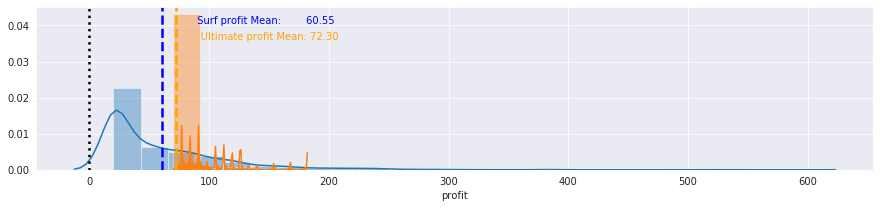

In [83]:
sample_1 = df_surf.profit
sample_2 = df_ultimate.profit

alpha = 0.05 # critical statistical significance level

results = st.ttest_ind(
        sample_1, 
        sample_2,
        equal_var = False )



# show the to samples distributions:

plt.figure(figsize=(15,3))
ax1 = sns.distplot(sample_1,bins = 25)
ax2 = sns.distplot(sample_2,bins = 5)

plt.axvline(np.mean(sample_1), color='b', linestyle='dashed', linewidth=2.5)
_, max_ = plt.ylim()
plt.text(
        sample_1.mean() + sample_1.mean() / 10,
        max_ - max_ / 10,
        "         Surf profit Mean:        {:.2f}".format(sample_1.mean()),
        color = 'b',
    )
plt.axvline(np.mean(sample_2), color='orange', linestyle='dashed', linewidth=2.5, )
plt.text(
        sample_2.mean() + sample_2.mean() / 10,
        max_ - max_ / 5,
        "     Ultimate profit Mean: {:.2f}".format(sample_2.mean()),
        color = 'orange',
    );
plt.axvline(results.pvalue, color='black', linestyle='dotted', linewidth=2.5, );



#conclusion:


print('The p-value is: ',results.pvalue)


if (results.pvalue < alpha):
        print(results.pvalue,"<",alpha,"\n"+"We reject the null hypothesis (H0).")
else:
        print(results.pvalue,">",alpha,"\n"+"We can't reject the null hypothesis (H0).") 


<h3><span  style="color:red">It can be clearly seen that the average profit of ultimate “falls” at the edge (if at all) of the profit distribution of surf.<br> And of course the average  went far away from  the critical statistical significance level  we defined<br><br>##We reject the null hypothesis.##</span>
</h3>

In this hypothesis we are asked to exclude a population from the sample and to examine it against the remaining population.<br>
**The characteristics are similar** -<br> The size of the samples is different, the variance is different (we will check this of course) and there is no dependence between the two samples!<br>**Therefore everything that was said at the beginning of the previous test is also valid now.**


**We will prepare the data and then test the hypotheses-**

**Extract customer data with NY-NJ:**

In [84]:
df_NYNJ = df_total[df_total.city.str.contains('NY-NJ')]
df_other = df_total[~df_total.city.str.contains('NY-NJ')]
# len(df_NYNJ)+len(df_other)
# len(df_total)

**We will check if the variances is  different:***

In [85]:
print('df_NYNJ  var is: ', np.var(df_NYNJ.profit))
print('df_other var is: ', np.var(df_other.profit))

df_NYNJ  var is:  1885.7843645817586
df_other var is:  2219.881380131179


Indeed the variances are different.

**Let's write the hypotheses formally:**



<a class='anchor' id="Hypothesis2."></a>
<h3><span style="color:darkblue">Hypothesis 2: The average profit from users in NY-NJ area is different from that of the users from other regions.</span></h3>
<h4><span style="color:green">H0: The average profit from users in NY-NJ area is equal  to  the rest of the costumers </span></h4> 
<h4><span style="color:red">H1: The average profit from users in NY-NJ area is not equal  to  the rest of the costumers</span></h4><br>
I choose the critical statistical significance level to be 3%.<br><br>
Same here- I chose to use the t test (or student test)-<br>
More specifically-ind t test, ind for independent Samples שnd that is exactly our case.<br>
In this type of test, we  comparing the average of two independent unrelated groups.
Meaning, we are comparing samples from two different populations and are testing whether or not they have a different average.

The p-value is: 0.03870322661292938
0.03870322661292938 > 0.03 
We can't reject the null hypothesis.


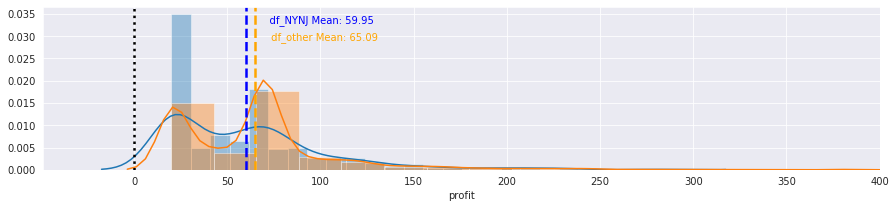

In [86]:
sample_1 = df_NYNJ.profit
sample_2 = df_other.profit

alpha = 0.03 # critical statistical significance level

results = st.ttest_ind(
        sample_1, 
        sample_2,
        equal_var = False )



# show the to samples distributions:

plt.figure(figsize=(15,3))
ax1 = sns.distplot(sample_1,bins = 25)
ax2 = sns.distplot(sample_2, bins = 25)
plt.xlim(right = 400)
plt.axvline(np.mean(sample_1), color='b', linestyle='dashed', linewidth=2.5)
_, max_ = plt.ylim()
plt.text(
        sample_1.mean() + sample_1.mean() / 10,
        max_ - max_ / 10,
        "    df_NYNJ Mean: {:.2f}".format(sample_1.mean()),
        color = 'b',
    )
plt.axvline(np.mean(sample_2), color='orange', linestyle='dashed', linewidth=2.5, )
plt.text(
        sample_2.mean() + sample_2.mean() / 10,
        max_ - max_ / 5,
        " df_other Mean: {:.2f}".format(sample_2.mean()),
        color = 'orange',
    );

plt.axvline(results.pvalue, color='black', linestyle='dotted', linewidth=2.5, )


#conclusion:


print('The p-value is:',results.pvalue)


if (results.pvalue < alpha):
        print(results.pvalue,"<",alpha,"\n"+"We reject the null hypothesis.")
else:
        print(results.pvalue,">",alpha,"\n"+"We can't reject the null hypothesis.") 

<h3><span  style="color:green">After testing the hypotheses, we found that at a significance level of 3%, the averages of the two populations tested were equal.<br>In this test I did not want to make it difficult, so I offered a lower-than-usual level of significance.<br>Of course we can see from the plot that the averages are indeed quite close to each other. ($ 6 difference) <br><br>##We can't reject the null hypothesis.##</span>
</h3>

<a class = 'anchor' id="step4.4"></a>
### Conclusions Step 4.
Having examined the behavior of consumers in the previous step, we examined at this step whether there is a difference (or not) between the profitability in different populations.<br>
The findings we found are -
1. The claim that the average profit is equal between the two plans can be rejected.
2. It can be assumed on the basis of the test that the average profit is equal between the customers who live in NY-NJ and the rest of the population (regardless of the plan).


<a class = 'anchor' id="step5."></a>
## Step 5. Overall conclusions
**After analysis of a sample from the entire population and examination of various hypotheses, the following conclusions were reached:**
1. The consumption habits of all customers are the same for the most parameters, which can help if we think about change things in the company later on (there is no need to put too much effort into thinking about the different populations).<br>

2. Customers are **willing to pay a lot of money when it comes to surfing the Internet** - this can be leveraged for an online campaign that will result in multiple consumption of data on the phones and consequently an increase in profits.<br>

3. According to the test, it seems that the averages between NJ-NY and the rest of the population are similar, this is interpreted as a good thing,**consumption is not affected by residential area but probably by product**.<br>(It is not possible to know on the basis of the given information).<br>
4. Based on the sample examined it was found that there are not many customers who left during 2018, which is an encouraging thing.

### Project completion checklist


- [x] How you explain the problems identified in the data
- [X] How you prepare the data for analysis
- [X] What graphs you plot for distributions
- [X] How you interpret the resulting graphs
- [X] How you calculate the standard deviation and variance
- [X] Whether you formulate the alternative and null hypotheses
- [X] What methods you use to test hypotheses
- [X] Whether you interpret the results of your hypothesis tests
- [X] Whether you follow the project structure and keep the code tidy
- [X] The conclusions you come to
- [X] Whether you leave comments at each step